In [1]:
from likelihood import *
from detection import *
from Profile_and_Contours import *
import matplotlib.pyplot as plt
import numpy as np
import time
from iminuit import Minuit
from scipy.stats import chi2   
import os.path
import pandas as pd 
import itertools
plt.style.use('style.mplstyle')

In [2]:
E_0_e,L_e,alpha_e,E_0_x,L_x,alpha_x,Pee=4.2,44,2.3,14.9,8,2.3,0.5

E_0_e_i,E_0_e_f=3,30
L_e_i,L_e_f=1.5,45

E_0_x_i,E_0_x_f=3,30
L_x_i,L_x_f=1.5,45

alpha_i,alpha_f=2,3

Pee_i,Pee_f=0,1

#NH

Likelihood_Garching_NH_Energy_Hierarchy.errordef = Minuit.LEAST_SQUARES
x0_NH_Energy_Hierarchy=[5.67,1.52,2.3,11.5,6.26,2.3]
m_NH_Energy_Hierarchy = Minuit(Likelihood_Garching_NH_Energy_Hierarchy, x0_NH_Energy_Hierarchy)
m_NH_Energy_Hierarchy.limits = [(E_0_e_i,E_0_e_f), (L_e_i,L_e_f),(alpha_i,alpha_f), (E_0_x_i,E_0_x_f), (L_x_i,L_x_f), (alpha_i,alpha_f)]
m_NH_Energy_Hierarchy.fixed["x2"] = True
m_NH_Energy_Hierarchy.fixed["x5"] = True

#IH
Likelihood_Garching_IH_Energy_Hierarchy.errordef = Minuit.LEAST_SQUARES
x0_IH_Energy_Hierarchy=[7.7,43,2.3,12.8,5,2.3]
m_IH_Energy_Hierarchy = Minuit(Likelihood_Garching_IH_Energy_Hierarchy, x0_IH_Energy_Hierarchy)
m_IH_Energy_Hierarchy.limits = [(E_0_e_i,E_0_e_f), (L_e_i,L_e_f),(alpha_i,alpha_f), (E_0_x_i,E_0_x_f), (L_x_i,L_x_f), (alpha_i,alpha_f)]
m_IH_Energy_Hierarchy.fixed["x2"] = True
m_IH_Energy_Hierarchy.fixed["x5"] = True

#Pee
Likelihood_Garching_Pee_Energy_Hierarchy.errordef = Minuit.LEAST_SQUARES
x0_Pee_Energy_Hierarchy=[7.839,44.997,2.3,13.134,1.6,2.3,0.041]
m_Pee_Energy_Hierarchy = Minuit(Likelihood_Garching_Pee_Energy_Hierarchy, x0_Pee_Energy_Hierarchy)
m_Pee_Energy_Hierarchy.limits = [(E_0_e_i,E_0_e_f), (L_e_i,L_e_f),(alpha_i,alpha_f), (E_0_x_i,E_0_x_f), (L_x_i,L_x_f), (alpha_i,alpha_f), (Pee_i,Pee_f)]
m_Pee_Energy_Hierarchy.fixed["x2"] = True
m_Pee_Energy_Hierarchy.fixed["x5"] = True

Likelihood_Garching_Pee_Energy_Ratio.errordef = Minuit.LEAST_SQUARES
x0=[E_0_e,L_e,alpha_e,1.2,L_x,alpha_x,Pee]
m_Pee_Energy_Ratio= Minuit(Likelihood_Garching_Pee_Energy_Ratio, x0)
m_Pee_Energy_Ratio.limits =[(E_0_e_i,E_0_e_f), (L_e_i,L_e_f),(alpha_i,alpha_f), (0.8,1.5), (L_x_i,L_x_f), (alpha_i,alpha_f), (Pee_i,Pee_f)]

In [3]:
#NH
start_time = time.time()
print(m_NH_Energy_Hierarchy.fval)
# print(m_NH_Energy_Hierarchy.params)
m_NH_Energy_Hierarchy.migrad()
print("Minuit NH= %s minutes" % ((time.time() - start_time)/60))
m_NH_Energy_Hierarchy_BF=np.array(m_NH_Energy_Hierarchy.values)
m_NH_Energy_Hierarchy_BF_like=np.array(m_NH_Energy_Hierarchy.fval)
np.save("Output/BF_NH_TI.npy", np.array(m_NH_Energy_Hierarchy_BF,dtype=object))
np.save("Output/BF_like_NH_TI.npy", np.array(m_NH_Energy_Hierarchy_BF_like,dtype=object))
m_NH_Energy_Hierarchy.minos()
print(m_NH_Energy_Hierarchy.fval)
print(m_NH_Energy_Hierarchy.params)


#IH
start_time = time.time()
print(m_IH_Energy_Hierarchy.fval)
# print(m_IH_Energy_Hierarchy.params)
m_IH_Energy_Hierarchy.migrad()
print("Minuit IH= %s minutes" % ((time.time() - start_time)/60))
m_IH_Energy_Hierarchy_BF=np.array(m_IH_Energy_Hierarchy.values)
m_IH_Energy_Hierarchy_BF_like=np.array(m_IH_Energy_Hierarchy.fval)
np.save("Output/BF_IH_TI.npy", np.array(m_IH_Energy_Hierarchy_BF,dtype=object))
np.save("Output/BF_like_IH_TI.npy", np.array(m_IH_Energy_Hierarchy_BF_like,dtype=object))
m_IH_Energy_Hierarchy.minos()
print(m_IH_Energy_Hierarchy.fval)
print(m_IH_Energy_Hierarchy.params)


#Pee
start_time = time.time()
print(m_Pee_Energy_Hierarchy.fval)
print(m_Pee_Energy_Hierarchy.params)
m_Pee_Energy_Hierarchy.migrad()
print("Minuit Pee= %s minutes" % ((time.time() - start_time)/60))
m_Pee_Energy_Hierarchy_BF=np.array(m_Pee_Energy_Hierarchy.values)
m_Pee_Energy_Hierarchy_BF_like=np.array(m_Pee_Energy_Hierarchy.fval)
np.save("Output/BF_Pee_TI.npy", np.array(m_Pee_Energy_Hierarchy_BF,dtype=object))
np.save("Output/BF_like_Pee_TI.npy", np.array(m_Pee_Energy_Hierarchy_BF_like,dtype=object))
m_Pee_Energy_Hierarchy.minos()
print(m_Pee_Energy_Hierarchy.fval)
print(m_Pee_Energy_Hierarchy.params)

start_time = time.time()
m_Pee_Energy_Ratio.migrad()
print("Minuit Pee= %s minutes" % ((time.time() - start_time)/60))
m_Pee_Energy_Ratio_BF=np.array(m_Pee_Energy_Ratio.values)
print(m_Pee_Energy_Ratio.fval)
print(m_Pee_Energy_Ratio.params)

None
Minuit NH= 0.029103859265645345 minutes
140.1237248005794
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │     8     │     5     │     -5     │     5      │    3    │   30    │       │
│ 1 │ x1   │ 1.500025  │ 37.569313 │ -0.000025  │ 10.076968  │   1.5   │   45    │       │
│ 2 │ x2   │   2.300   │   0.023   │            │            │    2    │    3    │  yes  │
│ 3 │ x3   │   12.8    │    1.8    │    -2.0    │    1.8     │    3    │   30    │       │
│ 4 │ x4   │    4.3    │    2.8    │    -2.8    │    4.0     │   1.5   │   45    │       │
│ 5 │ x5   │   2.300   │   0.023   │            │            │    2    │    3    │  yes  │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
None
Minuit IH= 0.025139705

In [4]:
params_index=[0,1,3,4]
params_lim=[(E_0_e_i,E_0_e_f),(L_e_i,L_e_f),(E_0_x_i,E_0_x_f),(L_x_i,L_x_f)]
params_label=[r"$\overline{E}_e$ [MeV]",r"$\varepsilon_e$ [$10^{52}$ ergs]",
              r"$\overline{E}_x$ [MeV]",r"$\varepsilon_x$ [$10^{52}$ ergs]"]

x_NH_prof,L_NH_prof,params_NH_prof=[],[],[]
x_IH_prof,L_IH_prof,params_IH_prof=[],[],[]
x_Pee_prof,L_Pee_prof,params_Pee_prof=[],[],[]

In [5]:
n_iterate=100
n_points=40

for i in range(len(params_index)):
    start_time = time.time()
    #NH
    print("NH")
    m_NH_Energy_Hierarchy.values=m_NH_Energy_Hierarchy_BF
    x, L, aux= param_profile(m_NH_Energy_Hierarchy,"x%d"%params_index[i],params_lim[i][0],params_lim[i][1],size=n_points,iterate=n_iterate,subtract_min=True)
    x_NH_prof.append(x)
    L_NH_prof.append(L)

    #IH
    print("IH")
    m_IH_Energy_Hierarchy.values=m_IH_Energy_Hierarchy_BF
    x, L, aux = param_profile(m_IH_Energy_Hierarchy,"x%d"%params_index[i],params_lim[i][0],params_lim[i][1],size=n_points,iterate=n_iterate,subtract_min=True)
    x_IH_prof.append(x)
    L_IH_prof.append(L)

    #Pee
    print("Pee")
    m_Pee_Energy_Hierarchy.values=m_Pee_Energy_Hierarchy_BF
    x, L, aux = param_profile(m_Pee_Energy_Hierarchy,"x%d"%params_index[i],params_lim[i][0],params_lim[i][1],size=n_points,iterate=n_iterate,subtract_min=True)
    x_Pee_prof.append(x)
    L_Pee_prof.append(L)
        
    print("Minuit ",params_label[i]," : ",((time.time() - start_time)/60)," minutes")

#Saving Data
np.save("Output/x_NH_TI_Energy_Hierarchy_prof.npy", np.array(x_NH_prof,dtype=object))
np.save("Output/Like_NH_TI_Energy_Hierarchy_prof.npy", np.array(L_NH_prof,dtype=object))
np.save("Output/x_IH_TI_Energy_Hierarchy_prof.npy", np.array(x_IH_prof,dtype=object))
np.save("Output/Like_IH_TI_Energy_Hierarchy_prof.npy", np.array(L_IH_prof,dtype=object))
np.save("Output/x_Pee_TI_Energy_Hierarchy_prof.npy", np.array(x_Pee_prof,dtype=object))
np.save("Output/Like_Pee_TI_Energy_Hierarchy_prof.npy", np.array(L_Pee_prof,dtype=object))

NH
IH
Pee
Minuit  $\overline{E}_e$ [MeV]  :  2.3481510996818544  minutes
NH
IH
Pee
Minuit  $\varepsilon_e$ [$10^{52}$ ergs]  :  1.0080700318018596  minutes
NH
IH
Pee
Faield to converge in  x3  =  7.846153846153846
Minuit  $\overline{E}_x$ [MeV]  :  1.46880331436793  minutes
NH
IH
Pee
Minuit  $\varepsilon_x$ [$10^{52}$ ergs]  :  0.6175062616666158  minutes


## 3.4.Contours <a class="anchor" id="3.4-bullet"></a>

In [6]:
params_index=[0,1,3,4]
params_lim=[(E_0_e_i,E_0_e_f),(L_e_i,L_e_f),(E_0_x_i,E_0_x_f),(L_x_i,L_x_f)]
params_label=[r"$\overline{E}_e$ [MeV]",r"$\varepsilon_e$ [$10^{52}$ ergs]",
              r"$\overline{E}_x$ [MeV]",r"$\varepsilon_x$ [$10^{52}$ ergs]"]

x_NH,y_NH,L_NH,k_NH,flag_NH=[],[],[],[],[]
x_IH,y_IH,L_IH,k_IH,flag_IH=[],[],[],[],[]
x_Pee,y_Pee,L_Pee,k_Pee,flag_Pee=[],[],[],[],[]

In [7]:
n_points=30
iterate=100
start_time_0 = time.time()
for i,j in itertools.combinations(range(len(params_index)), 2):
    start_time = time.time()
    print(i,j)
    info_i=params_index[i],params_lim[i][0],params_lim[i][1],n_points
    info_j=params_index[j],params_lim[j][0],params_lim[j][1],n_points
    #NH
    print("NH")
    m_NH_Energy_Hierarchy.values=m_NH_Energy_Hierarchy_BF
    x_aux,y_aux,L_aux,k_aux,flag_aux=two_dim_scan(m_NH_Energy_Hierarchy,info_i,info_j,iterate=iterate,subtract_min=True)
    x_NH.append(x_aux)
    y_NH.append(y_aux)
    L_NH.append(L_aux)
    k_NH.append(k_aux)
    flag_NH.append(flag_aux)
    
    #IH
    print("IH")    
    m_IH_Energy_Hierarchy.values=m_IH_Energy_Hierarchy_BF
    x_aux,y_aux,L_aux,k_aux,flag_aux=two_dim_scan(m_IH_Energy_Hierarchy,info_i,info_j,iterate=iterate,subtract_min=True)
    x_IH.append(x_aux)
    y_IH.append(y_aux)
    L_IH.append(L_aux)
    k_IH.append(k_aux)
    flag_IH.append(flag_aux)
    
    #Pee
    print("Pee")
    m_Pee_Energy_Hierarchy.values=m_Pee_Energy_Hierarchy_BF
    x_aux,y_aux,L_aux,k_aux,flag_aux=two_dim_scan(m_Pee_Energy_Hierarchy,info_i,info_j,iterate=iterate,subtract_min=True)
    x_Pee.append(x_aux)
    y_Pee.append(y_aux)
    L_Pee.append(L_aux)
    k_Pee.append(k_aux)
    flag_Pee.append(flag_aux)

    print("Took %s minutes" % ((time.time() - start_time)/60)) 

print("Total took %s minutes" % ((time.time() - start_time_0)/60)) 

#Saving Data
#NH
np.save("Output/x_NH_TI_Energy_Hierarchy_cont.npy", np.array(x_NH,dtype=object))
np.save("Output/y_NH_TI_Energy_Hierarchy_cont.npy", np.array(y_NH,dtype=object))
np.save("Output/Like_NH_TI_Energy_Hierarchy_cont.npy", np.array(L_NH,dtype=object))
np.save("Output/k_NH_TI_Energy_Hierarchy_cont.npy", np.array(k_NH,dtype=object))
np.save("Output/flag_NH_TI_Energy_Hierarchy_cont.npy", np.array(flag_NH,dtype=object))
#IH
np.save("Output/x_IH_TI_Energy_Hierarchy_cont.npy", np.array(x_IH,dtype=object))
np.save("Output/y_IH_TI_Energy_Hierarchy_cont.npy", np.array(y_IH,dtype=object))
np.save("Output/Like_IH_TI_Energy_Hierarchy_cont.npy", np.array(L_IH,dtype=object))
np.save("Output/k_IH_TI_Energy_Hierarchy_cont.npy", np.array(k_IH,dtype=object))
np.save("Output/flag_IH_TI_Energy_Hierarchy_cont.npy", np.array(flag_IH,dtype=object))

#Pee
np.save("Output/x_Pee_TI_Energy_Hierarchy_cont.npy", np.array(x_Pee,dtype=object))
np.save("Output/y_Pee_TI_Energy_Hierarchy_cont.npy", np.array(y_Pee,dtype=object))
np.save("Output/Like_Pee_TI_Energy_Hierarchy_cont.npy", np.array(L_Pee,dtype=object))
np.save("Output/k_Pee_TI_Energy_Hierarchy_cont.npy", np.array(k_Pee,dtype=object))
np.save("Output/flag_Pee_TI_Energy_Hierarchy_cont.npy", np.array(flag_Pee,dtype=object))

0 1
NH
IH
Pee
Took 13.557362806797027 minutes
0 2
NH
IH
Pee
Faield to converge in  0 , 3  =  14.172413793103448 , 18.82758620689655
Faield to converge in  0 , 3  =  14.172413793103448 , 17.89655172413793
Faield to converge in  0 , 3  =  14.172413793103448 , 16.96551724137931
Faield to converge in  0 , 3  =  15.10344827586207 , 13.241379310344827
Faield to converge in  0 , 3  =  15.10344827586207 , 21.620689655172413
Faield to converge in  0 , 3  =  16.03448275862069 , 20.689655172413794
Faield to converge in  0 , 3  =  8.586206896551724 , 5.793103448275862
Faield to converge in  0 , 3  =  16.96551724137931 , 13.241379310344827
Faield to converge in  0 , 3  =  16.96551724137931 , 14.172413793103448
Faield to converge in  0 , 3  =  16.96551724137931 , 15.10344827586207
Faield to converge in  0 , 3  =  18.82758620689655 , 14.172413793103448
Faield to converge in  0 , 3  =  18.82758620689655 , 15.10344827586207
Faield to converge in  0 , 3  =  18.82758620689655 , 16.03448275862069
Faield t

/home/holanda/Dropbox/pesquisa/github_programas/SN1987A-data-analysis-pub/SN1987A-2023analysis-vfinal/TimeIntegrated/detection.py:23: RuntimeWarning: invalid value encountered in less_equal
  p_pos = np.where(E_pos <= m_pos, 0., np.sqrt(abs((E_pos**2)-(m_pos**2)))) #positron momentum [MeV]
/home/holanda/Dropbox/pesquisa/github_programas/SN1987A-data-analysis-pub/SN1987A-2023analysis-vfinal/TimeIntegrated/detection.py:24: RuntimeWarning: invalid value encountered in less_equal
  E_nu = np.where(p_pos <= 0, 0., (E_pos+delta)/(1-((E_pos-(p_pos*cos_theta))/m_p)))
/home/holanda/Dropbox/pesquisa/github_programas/SN1987A-data-analysis-pub/SN1987A-2023analysis-vfinal/TimeIntegrated/detection.py:25: RuntimeWarning: invalid value encountered in less_equal
  E_nu = np.where(E_nu <= 1.806, 0., E_nu) #Energy Threshold [MeV] - Eq.(12.15) Giunti
/home/holanda/Dropbox/pesquisa/github_programas/SN1987A-data-analysis-pub/SN1987A-2023analysis-vfinal/TimeIntegrated/detection.py:184: RuntimeWarning: invali

Faield to converge in  1 , 4  =  40.5 , 3.0
Faield to converge in  1 , 4  =  40.5 , 4.5
Faield to converge in  1 , 4  =  40.5 , 6.0
Faield to converge in  1 , 4  =  40.5 , 7.5
Faield to converge in  1 , 4  =  40.5 , 9.0
Faield to converge in  1 , 4  =  40.5 , 10.5
Faield to converge in  1 , 4  =  40.5 , 12.0
Faield to converge in  1 , 4  =  40.5 , 13.5
Faield to converge in  1 , 4  =  40.5 , 15.0
Faield to converge in  1 , 4  =  40.5 , 16.5
Faield to converge in  1 , 4  =  40.5 , 18.0
Faield to converge in  1 , 4  =  40.5 , 19.5
Faield to converge in  1 , 4  =  40.5 , 21.0
Faield to converge in  1 , 4  =  40.5 , 22.5
Faield to converge in  1 , 4  =  40.5 , 24.0
Faield to converge in  1 , 4  =  40.5 , 25.5
Faield to converge in  1 , 4  =  40.5 , 27.0
Faield to converge in  1 , 4  =  40.5 , 28.5
Faield to converge in  1 , 4  =  40.5 , 30.0
Faield to converge in  1 , 4  =  40.5 , 31.5
Faield to converge in  1 , 4  =  40.5 , 33.0
Faield to converge in  1 , 4  =  40.5 , 34.5
Faield to conve

## 3.5. Plots <a class="anchor" id="3.5-bullet"></a>

In [18]:
#Load Data
#NH
x_NH_prof=np.load("Output/x_NH_TI_Energy_Hierarchy_prof.npy",allow_pickle=True)
L_NH_prof=np.load("Output/Like_NH_TI_Energy_Hierarchy_prof.npy",allow_pickle=True)
x_NH=np.load("Output/x_NH_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
y_NH=np.load("Output/y_NH_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
L_NH=np.load("Output/Like_NH_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
#IH
x_IH_prof=np.load("Output/x_IH_TI_Energy_Hierarchy_prof.npy",allow_pickle=True)
L_IH_prof=np.load("Output/Like_IH_TI_Energy_Hierarchy_prof.npy",allow_pickle=True)
x_IH=np.load("Output/x_IH_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
y_IH=np.load("Output/y_IH_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
L_IH=np.load("Output/Like_IH_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
#Pee
x_Pee_prof=np.load("Output/x_Pee_TI_Energy_Hierarchy_prof.npy",allow_pickle=True)
L_Pee_prof=np.load("Output/Like_Pee_TI_Energy_Hierarchy_prof.npy",allow_pickle=True)
x_Pee=np.load("Output/x_Pee_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
y_Pee=np.load("Output/y_Pee_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)
L_Pee=np.load("Output/Like_Pee_TI_Energy_Hierarchy_cont.npy",allow_pickle=True)

In [20]:
params_index=[0,1,3,4]
params_lim=[(E_0_e_i,E_0_e_f),(L_e_i,L_e_f),(E_0_x_i,E_0_x_f),(L_x_i,L_x_f)]
params_label=[r"$\overline{E}_e$ [MeV]",r"$\varepsilon_e$ [$10^{52}$ ergs]",
              r"$\overline{E}_x$ [MeV]",r"$\varepsilon_x$ [$10^{52}$ ergs]"]

/var/folders/_y/9wp0q4bd7xx4clpz9hvzfmxh0000gq/T/ipykernel_77771/1985754963.py:63: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(ax[1,0],labels=["IH","NH","Pee","Best Fit - IH","Best Fit - NH","Best Fit - Pee"],loc="upper center", bbox_to_anchor=(0.33, 0., 0.1, .999),fontsize=28)


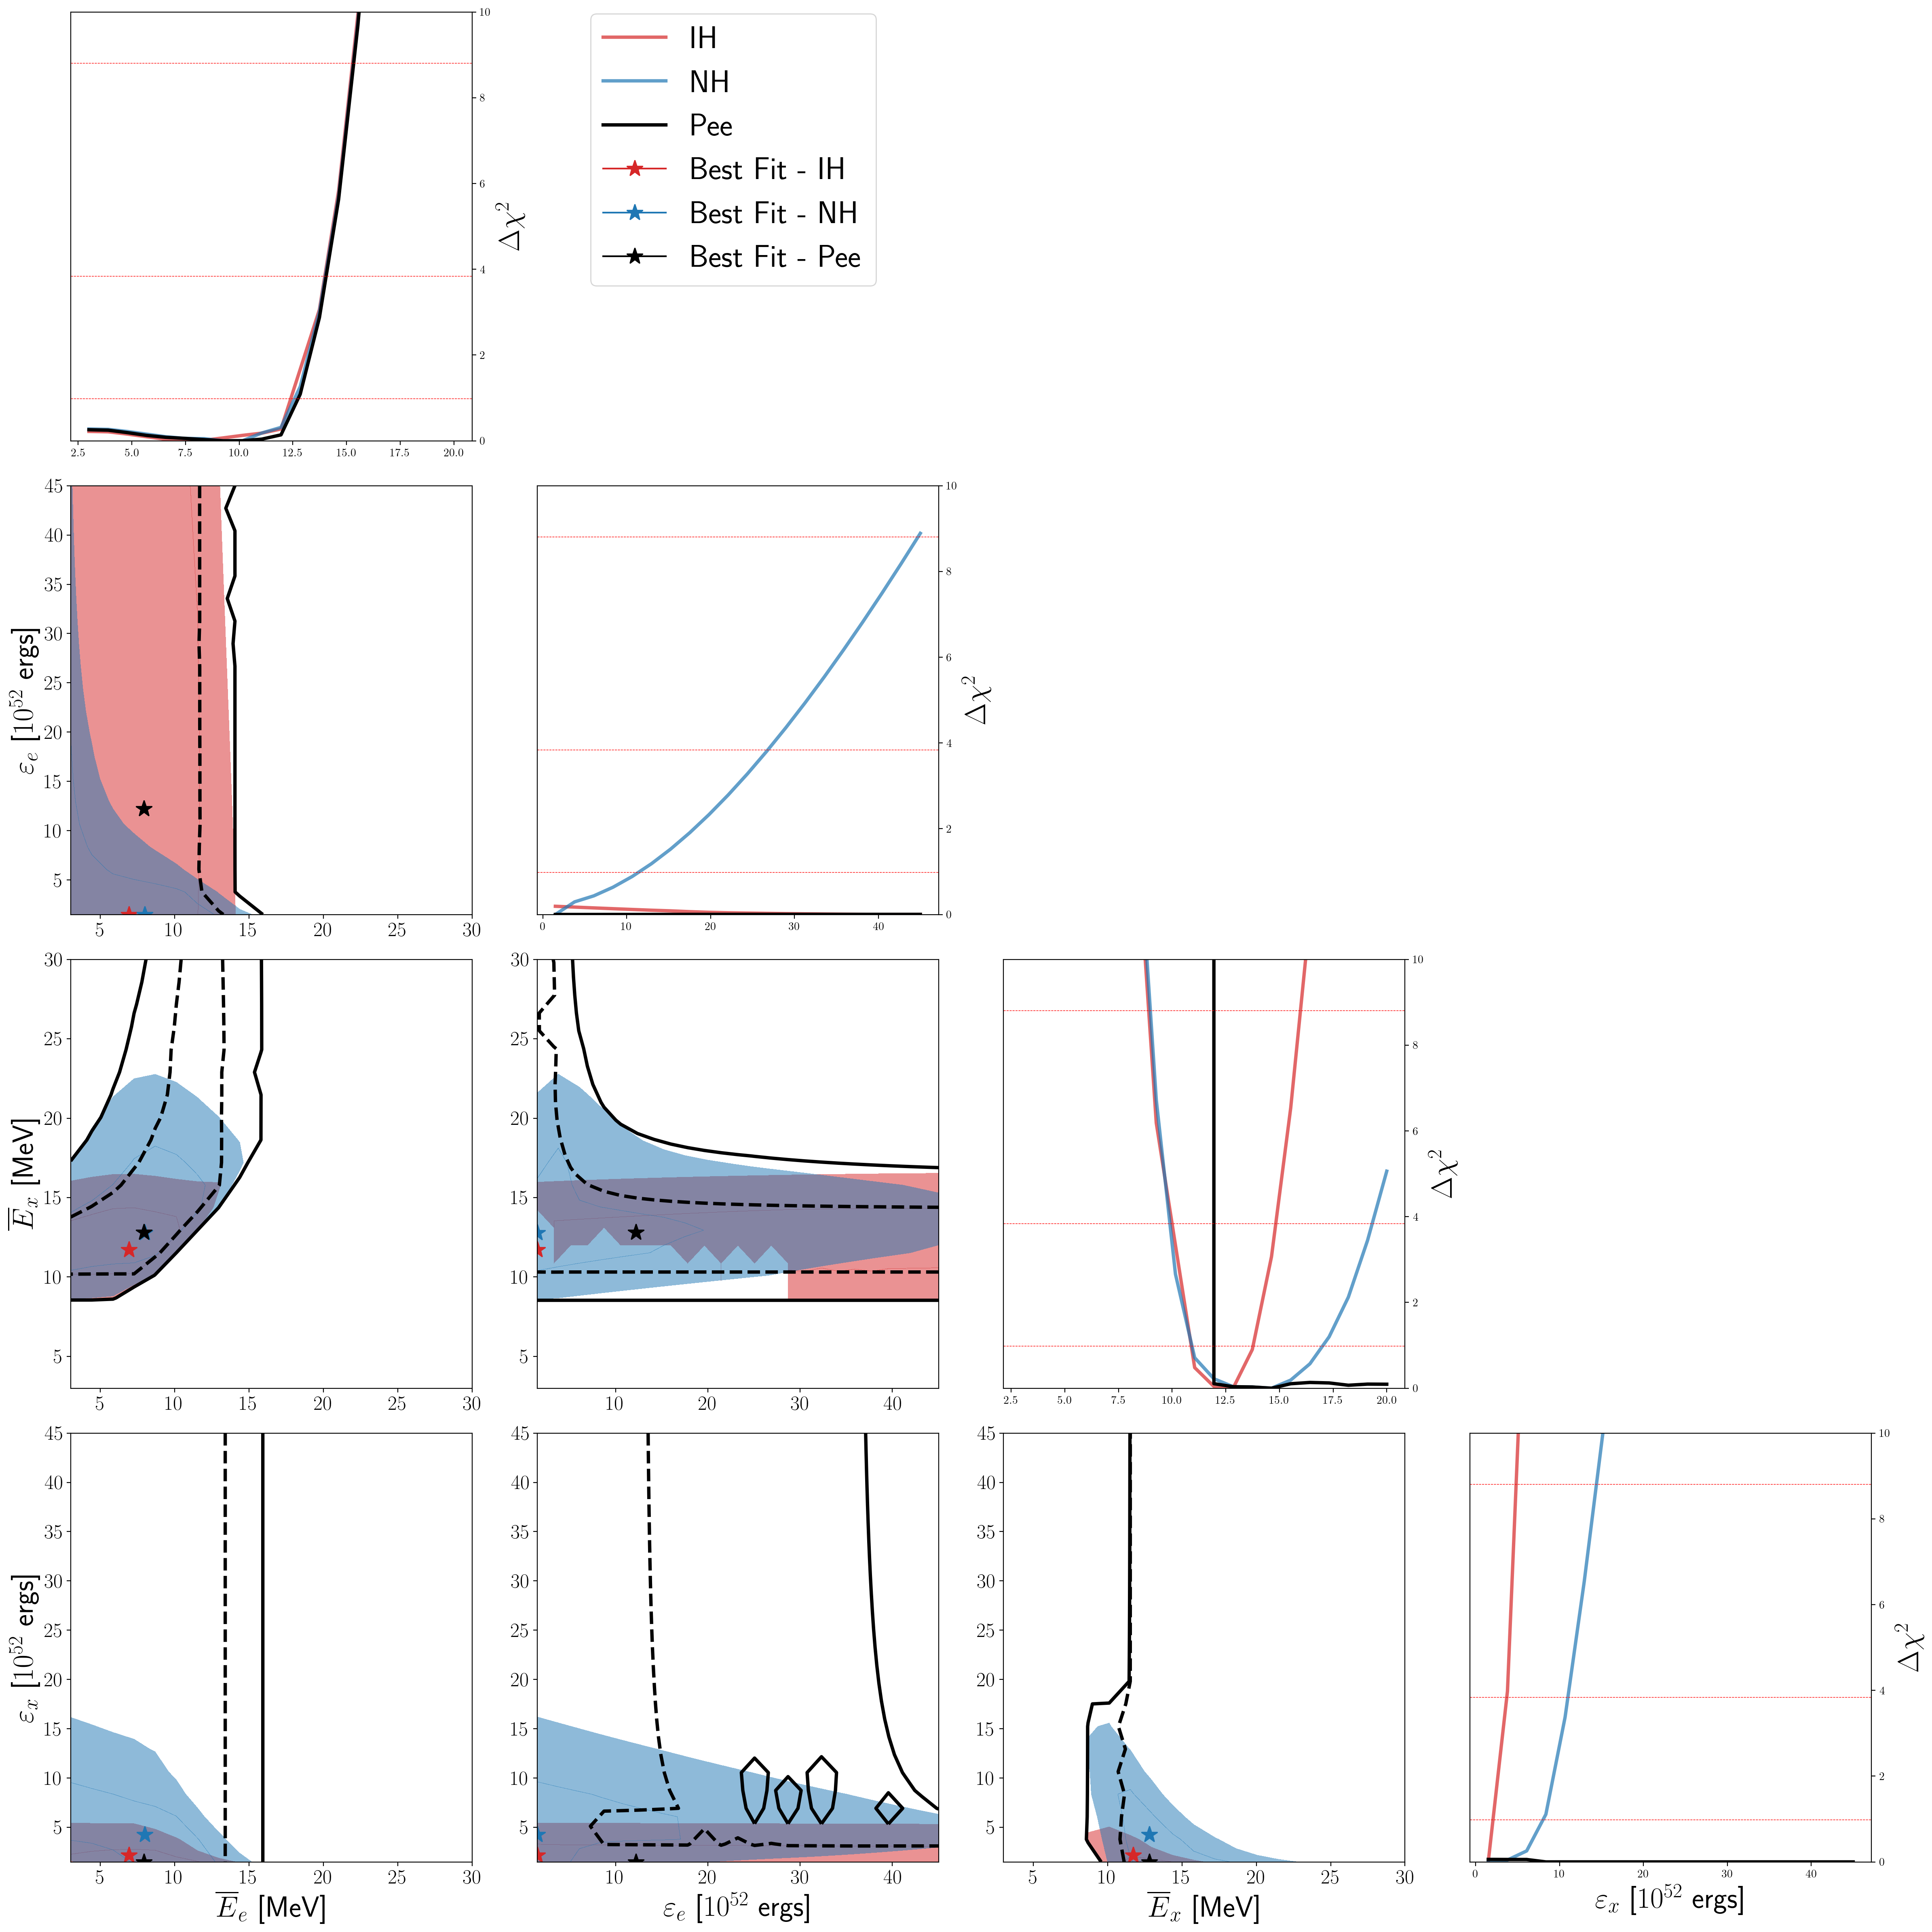

In [21]:
from functools import reduce
plt.style.use('style.mplstyle')

num_param=len(params_index)
font=26
lw=3

fig, ax = plt.subplots(figsize=(24, 24), ncols=num_param, nrows=num_param,dpi=200)
for i in range(num_param):
    for j in range(num_param):
        if i<j:
            fig.delaxes(ax[i, j])
            
for i in range(len(params_index)):
    ax_aux=ax[i,i]
    if i!=-1:
        ax_aux.plot(x_IH_prof[i],L_IH_prof[i],ls="-",c="tab:red", label='IH',lw=lw,alpha=0.7) 
        ax_aux.plot(x_NH_prof[i],L_NH_prof[i],ls="-",c="tab:blue", label='NH',lw=lw,alpha=0.7) 
        ax_aux.plot(x_Pee_prof[i],L_Pee_prof[i],ls="-",c="k", label='Pee',lw=lw)
        ax_aux.axhline(y=chi2.ppf(0.68, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.axhline(y=chi2.ppf(0.95, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.axhline(y=chi2.ppf(0.997, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.set_ylim(0,10)
        ax_aux.set_ylabel(r"$\Delta \chi^2$",fontsize=font)
        ax_aux.yaxis.set_label_position("right")
        ax_aux.yaxis.tick_right()
        if i==num_param-1:
            ax_aux.set_xlabel(params_label[i],fontsize=font)
        
    else:
        ax_aux.plot(L_NH_prof[i],x_NH_prof[i],c='b', label='NH',lw=lw)
        ax_aux.plot(L_IH_prof[i],x_IH_prof[i],c='orange', label='IH',lw=lw)
        ax_aux.plot(L_Pee_prof[i],x_Pee_prof[i],c='g', label='Pee',lw=lw)
        ax_aux.axvline(chi2.ppf(0.68, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.axvline(chi2.ppf(0.95, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.axvline(chi2.ppf(0.997, 1),label='_nolegend_', ls='--', color='r', lw=0.5)
        ax_aux.set_xlim(0,10)

l=0
levels=[chi2.ppf(0, 2),chi2.ppf(0.68, 2),chi2.ppf(0.997, 2)]
levels_cont=[chi2.ppf(0.90, 2)]
for i,j in itertools.combinations(range(num_param), 2):
    ax_aux=ax[j,i]
    k=0   
    #IH    
    ax_aux.contourf(x_IH[l][k],y_IH[l][k],np.transpose(L_IH[l][k]), levels=levels,colors="tab:red",alpha=0.5)
    ax_aux.plot(m_IH_Energy_Hierarchy_BF[params_index[i]],m_IH_Energy_Hierarchy_BF[params_index[j]],marker="*",label="Best Fit - IH", markersize=15,color="tab:red")
    #NH
    ax_aux.contourf(x_NH[l][k],y_NH[l][k],np.transpose(L_NH[l][k]), levels=levels,colors="tab:blue",alpha=0.5)
    ax_aux.plot(m_NH_Energy_Hierarchy_BF[params_index[i]],m_NH_Energy_Hierarchy_BF[params_index[j]],marker="*",label="Best Fit - NH", markersize=15,color="tab:blue")
    #Pee
    L_Pee_aux = reduce(np.minimum, (L_Pee[l][k],L_IH[l][k]))
    ax_aux.contour(x_Pee[l][k],y_Pee[l][k],np.transpose(L_Pee_aux),linewidths=lw, levels=levels,linestyles=["-","--"],colors='k')
    ax_aux.plot(m_Pee_Energy_Hierarchy_BF[params_index[i]],m_Pee_Energy_Hierarchy_BF[params_index[j]],marker="*",label="Best Fit - Pee", markersize=15,color="k")
    if i==0:
        ax_aux.set_ylabel(params_label[j],fontsize=font)
    if j==num_param-1:
        ax_aux.set_xlabel(params_label[i],fontsize=font)
    
    ax_aux.tick_params(axis='both', which='major', labelsize=18)
    l=l+1

fig.legend(ax[1,0],labels=["IH","NH","Pee","Best Fit - IH","Best Fit - NH","Best Fit - Pee"],loc="upper center", bbox_to_anchor=(0.33, 0., 0.1, .999),fontsize=28)
plt.tight_layout()
plt.savefig('plots_paper/Param_Triangle_Profile_Time_Integrated_filled.pdf', dpi=160)
plt.show()

## 3.6. Free $P_{\bar e \bar e}$ plots <a class="anchor" id="3.6-bullet"></a>

In [ ]:
tau_vec=[1,1.1,1.2,1.3,1.4,1.5]
m_Pee_Energy_Ratio.fixed["x3"] = True
n_iterate=20
n_points=30

for tau in tau_vec:
    start_time = time.time()
    
    m_Pee_Energy_Ratio.values=m_Pee_Energy_Ratio_BF
    m_Pee_Energy_Ratio.values["x3"]=tau
    x_Pee_Energy_Ratio, L_Pee_Energy_Ratio,aux = param_profile(m_Pee_Energy_Ratio,"x6",0,1,size=n_points,iterate=n_iterate,subtract_min=False)
    #Saving Arrays
    file_name="Output/Pee_Energy_Ratio_alpha_2.3_tau_"+str(tau)+".npy"
    np.save(file_name, x_Pee_Energy_Ratio)
    file_name="Output/Like_Pee_Energy_Ratio_alpha_2.3_tau_"+str(tau)+".npy"
    np.save(file_name, L_Pee_Energy_Ratio)
    
    print("Pee tau=%.2f took %s minutes" % (tau,(time.time() - start_time)/60))

In [19]:
#This data have efficiency, background
tau_vec=[1,1.1,1.2,1.3,1.4]
x_Pee=[]
L_Pee=[]

#Load
for tau in tau_vec:
    x_Pee.append(np.load("Output/Pee_Energy_Ratio_alpha_2.3_tau_"+str(tau)+".npy"))
    L_Pee.append(np.load("Output/Like_Pee_Energy_Ratio_alpha_2.3_tau_"+str(tau)+".npy"))
    
L_min=10**50
for i in range(len(tau_vec)):
    if L_min>np.amin(L_Pee[i]):
        L_min=np.amin(L_Pee[i])

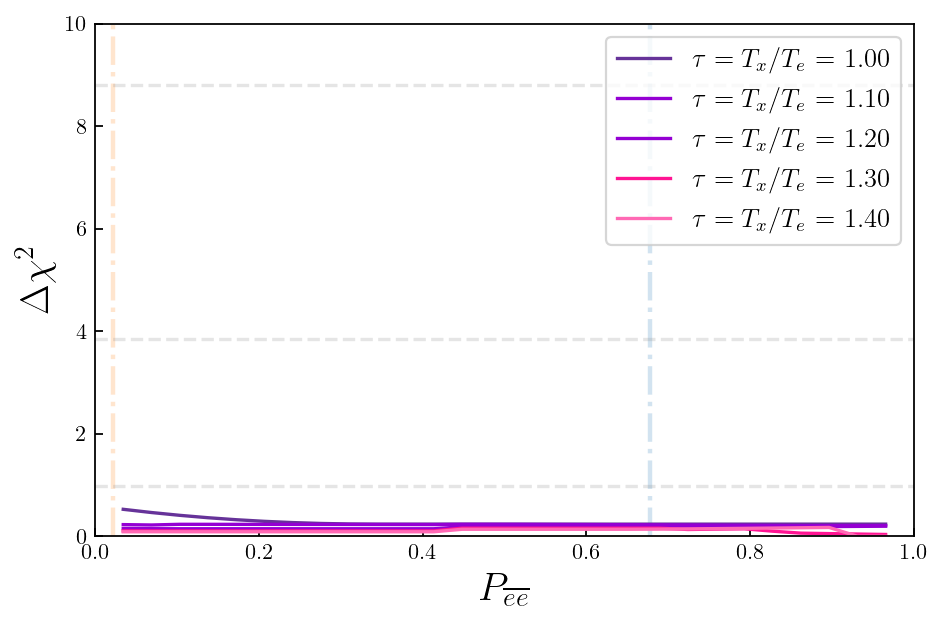

In [20]:
al = 0.2
paleta = ['rebeccapurple','darkviolet','darkviolet','deeppink','hotpink']

plt.figure(dpi=160)

Pee_NH = U[0][0]**2
Pee_IH = U[0][2]**2
plt.plot(Pee_NH*np.ones(100), np.linspace(0,20,100), '-.', lw=2,alpha=al)
plt.plot(Pee_IH*np.ones(100), np.linspace(0,20,100), '-.', lw=2,alpha=al)

for i in range(len(tau_vec)):
    plt.plot(x_Pee[i],L_Pee[i]-L_min,'-', c=paleta[i], label =r"$\tau=T_{x}/ T_{e}$ = %.2f"%(tau_vec[i]))

plt.xlabel(r'$P_{\overline{ee}}$', fontsize=18)
plt.ylabel(r'$\Delta\chi^2$', fontsize=18)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.997, 1),'--', color='gray', alpha=al)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.95, 1),'--', color='gray', alpha=al)
plt.plot(np.linspace(0,1,101), np.ones(101)*chi2.ppf(0.68, 1),'--', color='gray', alpha=al)
plt.ylim(0,10)
plt.xlim(0,1)
plt.legend(loc='upper right',fontsize=12)
plt.tick_params(direction='in')
plt.tight_layout()
plt.savefig('plots_paper/Pee_SN1987A_time_integrated_alpha_2.3_EH_Limit_1.pdf',dpi=160)
plt.show()

# 4. Efficiency <a class="anchor" id="4-bullet"></a>

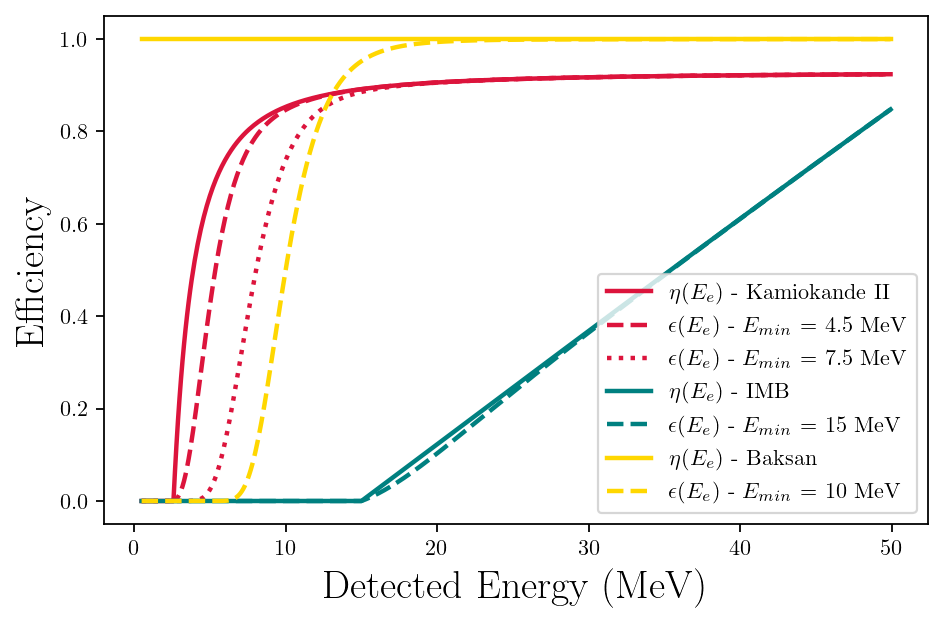

In [21]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

l=2
E_vec=np.arange(0.5,50,0.1)

plt.figure(dpi=160)
#Kamiokande II
plt.plot(E_vec,eff(E_vec,"K",model="Vissani",typ="intrinsic"), linestyle='-', c='crimson', lw=l ,label='$\eta(E_e)$ - Kamiokande II')
plt.plot(E_vec,eff(E_vec,"K",model="Vissani",typ="total",E_min=4.5), linestyle='--', c='crimson', lw=l,label='$\epsilon(E_e)$ - $E_{min}$ = 4.5 MeV')
plt.plot(E_vec,eff(E_vec,"K",model="Vissani",typ="total",E_min=7.5), linestyle=':', c='crimson', lw=l,label='$\epsilon(E_e)$ - $E_{min}$ = 7.5 MeV')

#IMB
plt.plot(E_vec,eff(E_vec,"I",model="Vissani",typ="intrinsic"), linestyle='-', c='teal', lw=l,label='$\eta(E_e)$ - IMB')
plt.plot(E_vec,eff(E_vec,"I",model="Vissani",typ="total",E_min=15), linestyle='--', c='teal', lw=l,label='$\epsilon(E_e)$ - $E_{min}$ = 15 MeV')
#Baksan
plt.plot(E_vec,eff(E_vec,"B",model="Vissani",typ="intrinsic"), linestyle='-', c='gold', lw=l,label='$\eta(E_e)$ - Baksan')
plt.plot(E_vec,eff(E_vec,"B",model="Vissani",typ="total",E_min=10), linestyle='--', c='gold', lw=l,label='$\epsilon(E_e)$ - $E_{min}$ = 10 MeV')
plt.xlabel('Detected Energy (MeV)', fontsize=18)
plt.ylabel(r'Efficiency', fontsize=18)
plt.legend()
plt.tight_layout()
plt.savefig('plots_paper/detectors_efficiency.pdf', dpi=160)
plt.show()